In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

### 1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

Rolling sevens is more probable than rolling snake eyes. The only way to get snake eyes is if both dices roll a one, thus a probabilty of 1/36. There are six ways to get a sum of seven (1:6,2:5,3:4,6:1,5:2,6:1), giving sevens a probabilty of 1/6. The ratio of rolling snake eyes vs sevens is 1:6.

### 2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram)

x|Combinations | Probabilties 
-- | -- | --  
1 | 0  | 0  
2 | (1,1)  | 1/36  
3 | (1,2), (2,1)  | 2/18  
4 | (1,3),(2,2),(3,1)  | 1/12  
5 | (1,4),(2,3),(3,2),(4,1)  | 1/9  
6 | (1,5),(2,4),(3,3),(4,2),(5,1) | 5/36   
7 | (1,6),(2,5),(3,4),(4,3),(5,2),(6,1)  | 1/6  
8 | (2,6),(3,5),(4,4),(5,3),(6,2)  | 5/36  
9 | (3,4),(4,5),(5,4),(4,3)  | 1/9  
10 | (4,6),(5,5),(6,4)  | 1/12   
11 | (5,6),(6,5)  | 1/18  
12 | (6,6) | 1/36  
13 | 0  | 0  

Discrete Convolution Equation: 
$P_{A+B}(x)= \sum_z P_A(z)P_B(x-z)$

In [3]:
probabilities = [0.166,0.166,0.166,0.166,0.166,0.166]

convolved = np.convolve(probabilities,probabilities, mode='full')
convolved

array([0.027556, 0.055112, 0.082668, 0.110224, 0.13778 , 0.165336,
       0.13778 , 0.110224, 0.082668, 0.055112, 0.027556])

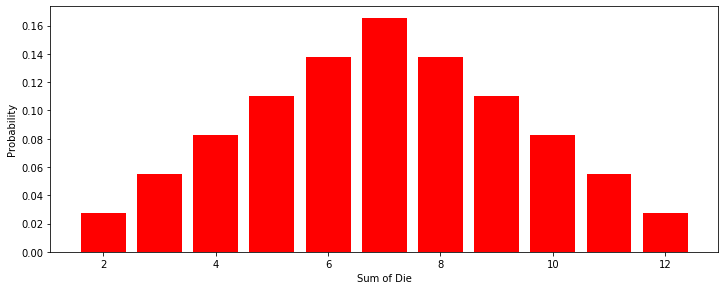

In [5]:
x = [2,3,4,5,6,7,8,9,10,11,12]
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,4)

fig.tight_layout()

ax.set_ylabel('Probability')
ax.set_xlabel("Sum of Die")
ax.bar(x, convolved, color='r');

### 3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

   mean = $\sum xp $  
variance = $\sum (x-mean)^2 p $

In [23]:
x = np.array([1.0,2.0,3.0,4.0,5.0,6.0])

probabilities = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
mean = np.sum(x * probabilities)
mean

3.5

In [25]:
variance = np.sum((x - mean) ** 2 * probabilities)
variance

2.9166666666666665

### 4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

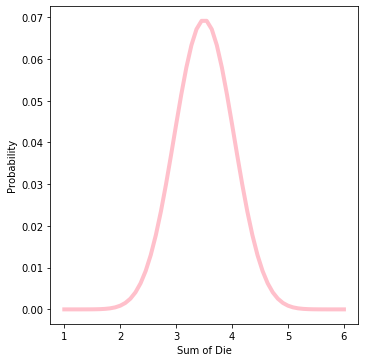

In [35]:
probabilities = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
results = probabilities

for index in range(10):
    results = np.convolve(probabilities,results, mode='full')

x = np.linspace(1,6, results.size)
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,5)

fig.tight_layout()

ax.set_ylabel('Probability')
ax.set_xlabel("Sum of Die")
ax.plot(x, results, color='pink', marker='None', linestyle='-', linewidth=4);
ax.plot(x, results, color='pink', marker='None', linestyle='-', linewidth=4);

This does appear to be a Gaussian distribution and is approximately so. This makes sense due to the entral limit theorem which states that the distribution of sample means approximates a normal distribution. If we increased the number of die, this distribution of means would become even more gaussian.

### 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

Times Averaged: 1
Mean: -6.583795669561597e-15
Variance: 9.994923430270854

Times Averaged: 2
Mean: -3.2918978347807985e-15
Variance: 7.06747813498483

Times Averaged: 3
Mean: -2.3891618833326873e-15
Variance: 5.77057173299658

Times Averaged: 4
Mean: -1.6459489173903993e-15
Variance: 4.997461715135427

Times Averaged: 5
Mean: -5.382623329257957e-16
Variance: 4.469865643998202

Times Averaged: 6
Mean: -1.1945809416663436e-15
Variance: 4.080410403725289

Times Averaged: 7
Mean: -2.06125467714334e-18
Variance: 3.7777259670898973

Times Averaged: 8
Mean: -8.229744586951996e-16
Variance: 3.533739067492415

Times Averaged: 9
Mean: -5.683176029932201e-16
Variance: 3.331641143423615

Times Averaged: 10
Mean: -2.6913116646289786e-16
Variance: 3.1606723078639027



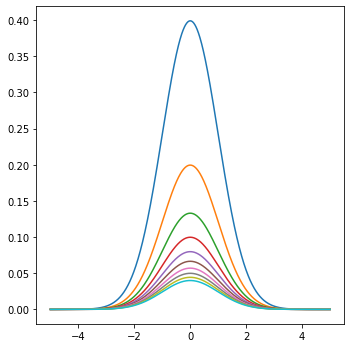

In [20]:
#Creates a gaussian
x = np.linspace(-5,5, 1000)
gaussian = stats.norm.pdf(x, loc=0, scale=1)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,5)

fig.tight_layout()
results = gaussian

for index in range(10):
    trials = index + 1
    average = results / trials
    
    x = np.linspace(-5,5, average.size)
    mean = sum(x * average)
    variance = (sum(average * x ** 2) - mean ** 2) ** 0.5
    ax.plot(x, average)
    
    print("Times Averaged:", trials)
    print("Mean:", mean)
    print("Variance:", variance)
    print()
    


The variance, or standard deviation, gets smaller with every time the gaussian is averaged. So, the more trials results in less variance and better results. Then, with integrating a signal over time, probabilities of edge cases (detecting false signals), become less probably as well since the variance is less.